# United States COVID-19 County Level Data Analysis

By: Matthew Zhang and Yang Chen

## Data Introduction

For our first elementary data analysis assignment, we decided to utilise a dataset that analyses the County Level data for COVID-19 in the United States. We decided to use this dataset due to the nature of the COVID-19 pandemic and its effect on the population of the entire world. We also have had familiarity with the usage of such datasets as we previously took CSI 2300: Intro to Data Science where we analysed similar datasets. 

## Questions to be Answered in our Analysis

Our primary concern is to extrapolate and analyse data that would be of the most use to any professional in a field that would analyse such data. In this particular instance, we would be targeting the health care professionals, those in charge of allocating medical resources, and local, state, and national governments. Thusly these were the questions we thought most worthwhile to answer about the dataset:

* Is there a correlation between the population of the health service area population and COVID-19 cases/hospitalisations?
    * Furthermore, is there a correlation between the population of the county and serviced area in general and the COVID cases/hopsitalisations?
* What is the relationship between COVID-19 cases per capita and the number of hospitalisations per capita?
* What is the criteria for classifying the COVID-19 community level (as low, medium, or high)
* What is the relationship between a state's COVID-19 response and their case data?
* What is the relationship between hospitalisations and cases per capita and the bed utilisation?

The general question to be answered was how does the data show the effectiveness of COVID policy in different counties and states and what does that indicate to us about the overall effectiveness of the United States' COVID-19 pandemic response and what should be done next time to avoid making the same mistakes that occurred during the COVID pandemic?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
df = pd.read_csv("United_States_COVID-19_Community_Levels_by_County.csv")
df.head()

,county,county_fips,state,county_population,health_service_area_number,health_service_area,health_service_area_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_cases_per_100k,covid-19_community_level,date_updated
0,Lincoln County,55069,Wisconsin,27593.0,282,"Marathon (Wausau), WI - Wood, WI",291401.0,4.7,13.4,177.58,Medium,2022-08-18
1,Manitowoc County,55071,Wisconsin,78981.0,355,"Sheboygan (Sheboygan), WI - Manitowoc, WI",244410.0,3.4,9.8,169.66,Low,2022-08-18
2,Marathon County,55073,Wisconsin,135692.0,282,"Marathon (Wausau), WI - Wood, WI",291401.0,4.7,13.4,209.30,High,2022-08-18
3,Monroe County,55081,Wisconsin,46253.0,290,"La Crosse (La Crosse), WI - Monroe, WI",257027.0,3.9,15.6,216.20,High,2022-08-18
4,Portage County,55097,Wisconsin,70772.0,400,"Portage, WI",70772.0,5.9,7.1,217.60,Medium,2022-08-18


## Cleaning the Data

In [3]:
df.isna().sum()

county                                  0
county_fips                             0
state                                   0
county_population                       1
health_service_area_number              0
health_service_area                     0
health_service_area_population         21
covid_inpatient_bed_utilization       278
covid_hospital_admissions_per_100k    146
covid_cases_per_100k                    0
covid-19_community_level              142
date_updated                            0
dtype: int64

The first order of work is to drop the unnecessary columns from the dataset.

In this scenario, this will involve dropping the County FIPS Code, Health Service Area Number, and Date of Last Update of the dataset.

In [4]:
df = df.drop('county_fips', axis=1)
df = df.drop('health_service_area_number', axis=1)
df = df.drop('date_updated', axis=1)
df.head()

,county,state,county_population,health_service_area,health_service_area_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_cases_per_100k,covid-19_community_level
0,Lincoln County,Wisconsin,27593.0,"Marathon (Wausau), WI - Wood, WI",291401.0,4.7,13.4,177.58,Medium
1,Manitowoc County,Wisconsin,78981.0,"Sheboygan (Sheboygan), WI - Manitowoc, WI",244410.0,3.4,9.8,169.66,Low
2,Marathon County,Wisconsin,135692.0,"Marathon (Wausau), WI - Wood, WI",291401.0,4.7,13.4,209.30,High
3,Monroe County,Wisconsin,46253.0,"La Crosse (La Crosse), WI - Monroe, WI",257027.0,3.9,15.6,216.20,High
4,Portage County,Wisconsin,70772.0,"Portage, WI",70772.0,5.9,7.1,217.60,Medium


After the offending columns are dropped we will then rename the columns to make the dataset a bit easier to work with and easier to read and interpret. We will also additionally drop all NA and null values from the dataset.

In [5]:
df.rename(columns = {'county': 'County',
                    'state': 'State',
                    'county_population': 'County Population',
                    'health_service_area': 'Health Area Serviced',
                    'health_service_area_population': 'Serviced Population',
                    'covid_inpatient_bed_utilization': 'COVID Bed Utilisation',
                    'covid_hospital_admissions_per_100k': 'Hospitalisations Per 100k',
                    'covid_cases_per_100k': 'COVID-19 Cases Per 100k',
                    'covid-19_community_level': 'Community Level of COVID-19',}, inplace=True)
df.dropna(how='any', inplace=True)
df.head()

,County,State,County Population,Health Area Serviced,Serviced Population,COVID Bed Utilisation,Hospitalisations Per 100k,COVID-19 Cases Per 100k,Community Level of COVID-19
0,Lincoln County,Wisconsin,27593.0,"Marathon (Wausau), WI - Wood, WI",291401.0,4.7,13.4,177.58,Medium
1,Manitowoc County,Wisconsin,78981.0,"Sheboygan (Sheboygan), WI - Manitowoc, WI",244410.0,3.4,9.8,169.66,Low
2,Marathon County,Wisconsin,135692.0,"Marathon (Wausau), WI - Wood, WI",291401.0,4.7,13.4,209.30,High
3,Monroe County,Wisconsin,46253.0,"La Crosse (La Crosse), WI - Monroe, WI",257027.0,3.9,15.6,216.20,High
4,Portage County,Wisconsin,70772.0,"Portage, WI",70772.0,5.9,7.1,217.60,Medium


In [6]:
df.dtypes

County                          object
State                           object
County Population              float64
Health Area Serviced            object
Serviced Population            float64
COVID Bed Utilisation          float64
Hospitalisations Per 100k      float64
COVID-19 Cases Per 100k        float64
Community Level of COVID-19     object
dtype: object

In [7]:
df.isna().sum()

County                         0
State                          0
County Population              0
Health Area Serviced           0
Serviced Population            0
COVID Bed Utilisation          0
Hospitalisations Per 100k      0
COVID-19 Cases Per 100k        0
Community Level of COVID-19    0
dtype: int64

In [8]:
df.count()

County                         157693
State                          157693
County Population              157693
Health Area Serviced           157693
Serviced Population            157693
COVID Bed Utilisation          157693
Hospitalisations Per 100k      157693
COVID-19 Cases Per 100k        157693
Community Level of COVID-19    157693
dtype: int64

# Descriptive Statistics and Visualisation

## Hospitalisations and Cases 

The first order of action here is to retrieve the hospitalisations per capita and the cases per capita.

In [9]:
df[['Hospitalisations Per 100k', 'COVID-19 Cases Per 100k', 'Serviced Population']].describe()

,Hospitalisations Per 100k,COVID-19 Cases Per 100k,Serviced Population
count,157693.000000,157693.000000,1.576930e+05
mean,7.882669,132.570044,5.810521e+05
std,6.628159,167.819816,9.901844e+05
min,0.000000,0.000000,2.274000e+03
25%,3.300000,45.990000,9.034600e+04
50%,6.700000,97.190000,2.256140e+05
75%,10.800000,173.990000,5.545570e+05
max,171.200000,13017.750000,1.321480e+07


Extracting Hospitalisation Outliers
IQR = Q3-Q1, Q1-1.5(IQR) and Q3+1.5(IQR) are outliers 

Hospitalisations IQR = 10.8-3.4 = 7.4
Outlier Fences: 3.4-(1.5*7.4) = -7.7, 10.8+(11.1) = 21.9

In [10]:
df['Hospitalisations Per 100k'][(df['Hospitalisations Per 100k'] > 21.9)].count()

5014

Extracting Case Outliers

Case IQR = 171-45.82 = 125.18
Outlier Fences: 45.82-125.18 = = -79.36, 171 + 125.18 = 196.18

In [11]:
df['COVID-19 Cases Per 100k'][(df['COVID-19 Cases Per 100k'] > 196.18)].count()

32108

While there are a significant number of outlier values (37554) and they have values that are significantly beyond the reasonable expectations, we do want to concern ourselves with the said outlier values (for later down the road)
so for our intents and purposes, we will not be removing the outliers from the dataset. 

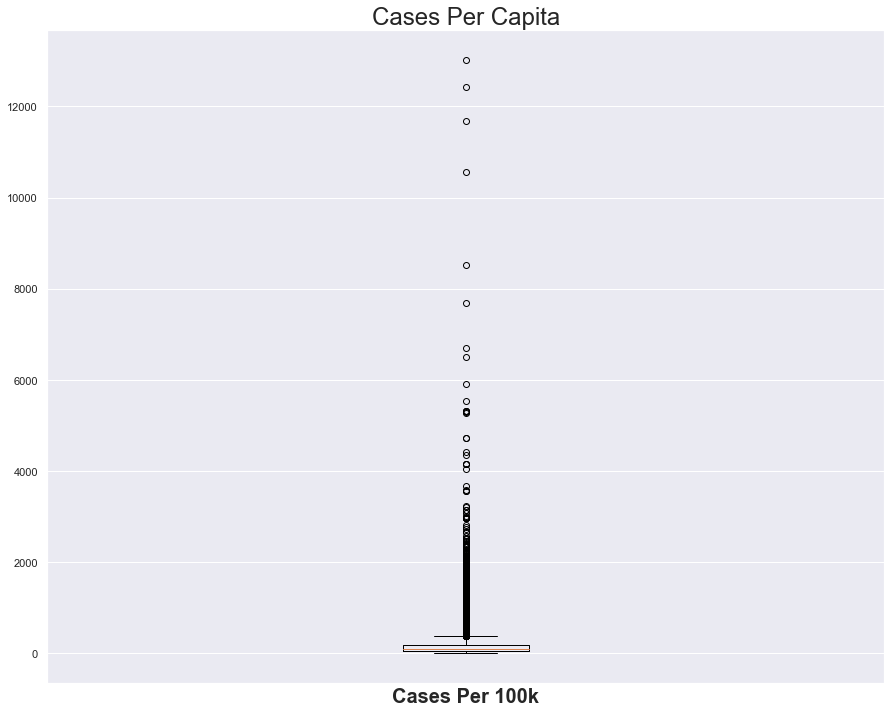

In [12]:
fig, ax = plt.subplots(figsize=(15,12))
x = df['COVID-19 Cases Per 100k']

plt.boxplot(x)
plt.title('Cases Per Capita', fontsize=24)
plt.xlabel('Cases Per 100k', fontsize=20, fontweight='bold')
plt.xticks([])

plt.show()

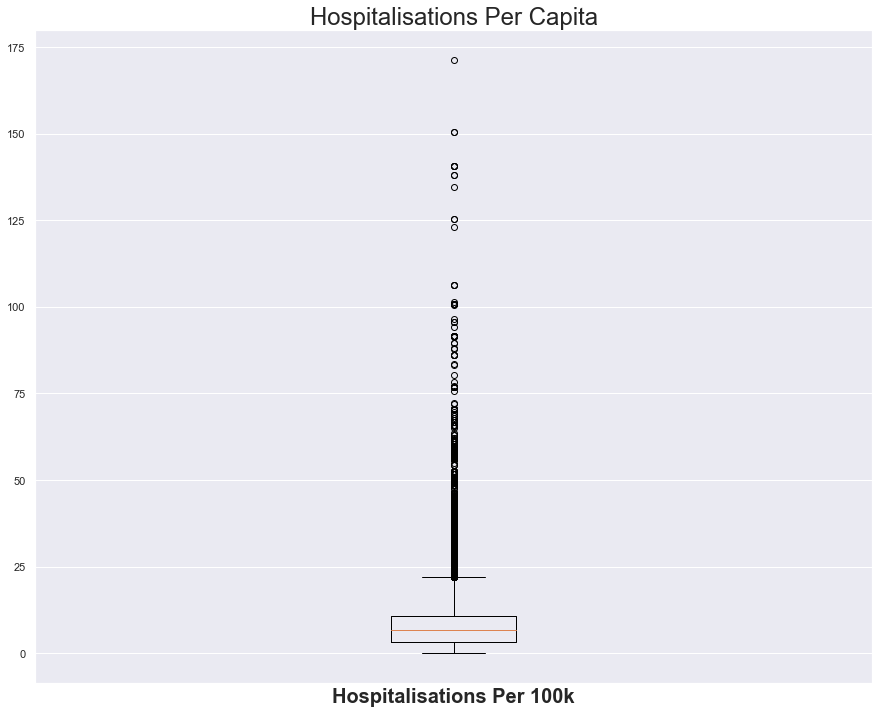

In [13]:
fig, ax = plt.subplots(figsize=(15,12))
x = df['Hospitalisations Per 100k']

plt.boxplot(x)
plt.title('Hospitalisations Per Capita', fontsize=24)
plt.xlabel('Hospitalisations Per 100k', fontsize=20, fontweight='bold')
plt.xticks([])

plt.show()

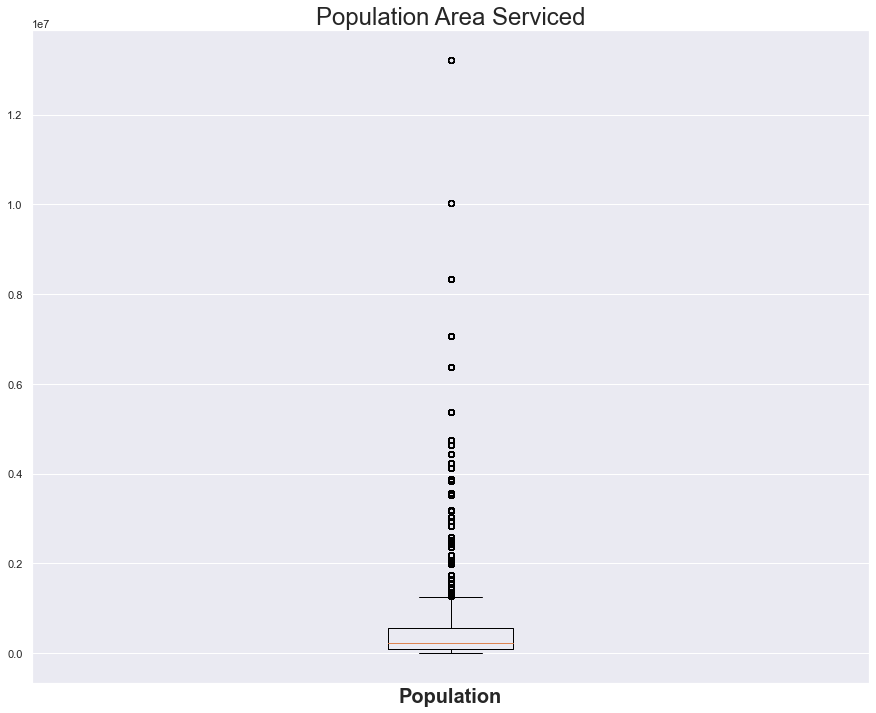

In [14]:
fig, ax = plt.subplots(figsize=(15,12))
x = df['Serviced Population']

plt.boxplot(x)
plt.title('Population Area Serviced', fontsize=24)
plt.xlabel('Population', fontsize=20, fontweight='bold')
plt.xticks([])

plt.show()

## Relationship Between the Serviced Area/County Population and the Number of Hospitalisations/Cases per Capita

The initial observations to make here of the distribution of the Serviced Population, Cases, and Hospitalisations per Capita is that they have a similar distributions with regards to outliers beyond the outer fence (Past the 75th Percentile). The initial observation to be made here is that the United States did not hand the COVID-19 Pandemic very well as there appears to be a large incidence of cases in general and hospitalisations. 

Our main concern here is examining the outliers in the departments of cases and hospitalisations, so our first order of action is to plot the Cases and Hospitalisations vs the Serviced Population then juxtapose Cases and Hopsitalisations with the County Population

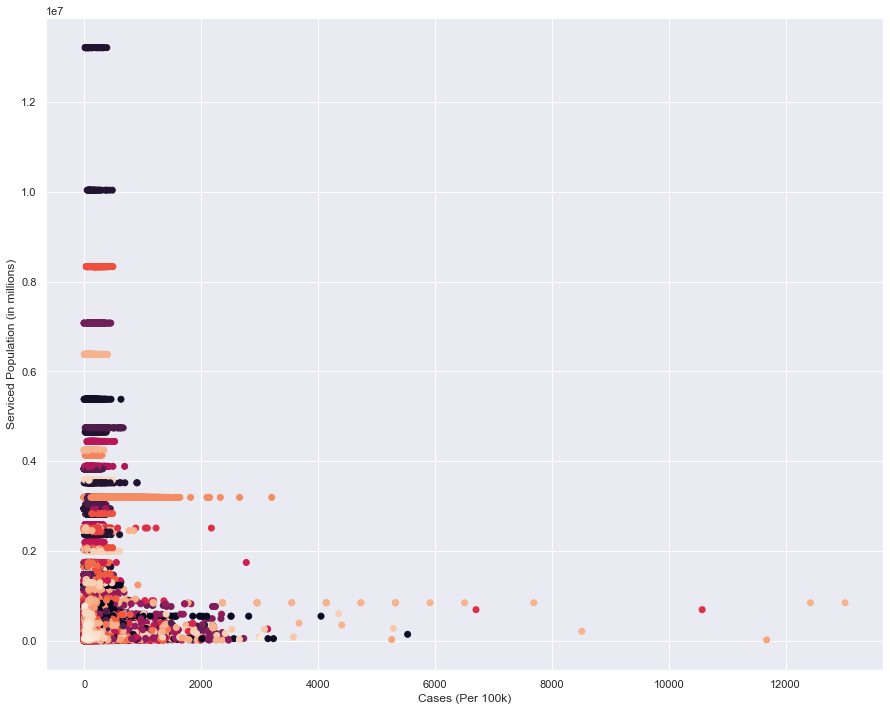

In [15]:
fig, ax = plt.subplots(figsize=(15,12))
x = df['COVID-19 Cases Per 100k']
y = df['Serviced Population']

ax.set_xlabel('Cases (Per 100k)')
ax.set_ylabel('Serviced Population (in millions)')


#ax.set_xlim(left=-50, right=6000)
#ax.set_ylim(bottom=-0.1, top=0.9)

#ax.set(xlim = (-50, 6000),
#      ylim = (-0.1, 0.9),
#      autoscale_on = False)

scatter = plt.scatter(x, y, c=df.State.astype('category').cat.codes)

plt.show()

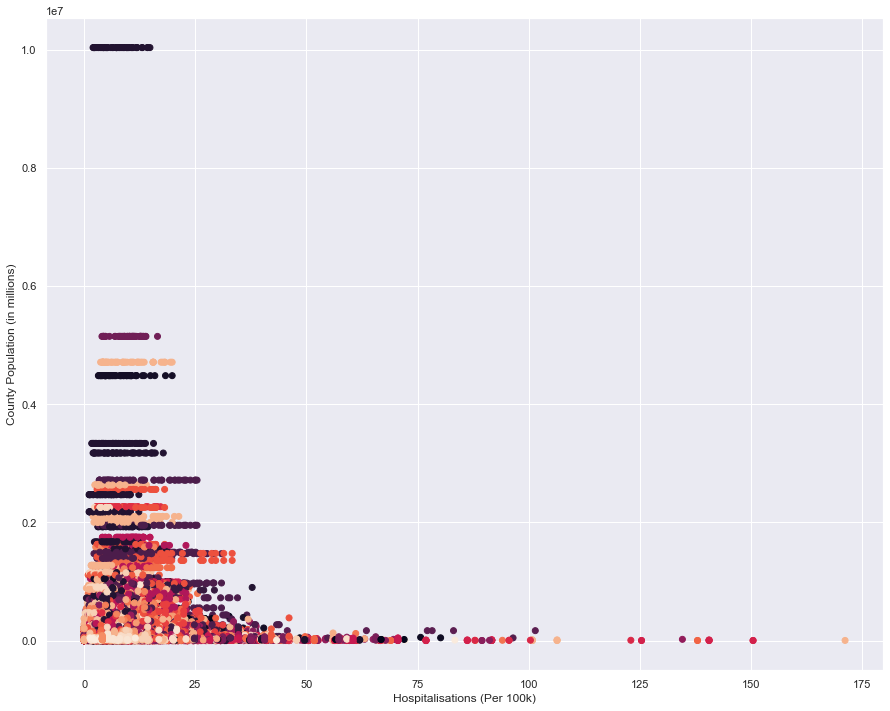

In [16]:
fig, ax = plt.subplots(figsize=(15,12))
x = df['Hospitalisations Per 100k']
y = df['County Population']

scatter = plt.scatter(x, y, c=df.State.astype('category').cat.codes)
ax.set_xlabel('Hospitalisations (Per 100k)')
ax.set_ylabel('County Population (in millions)')

plt.show()

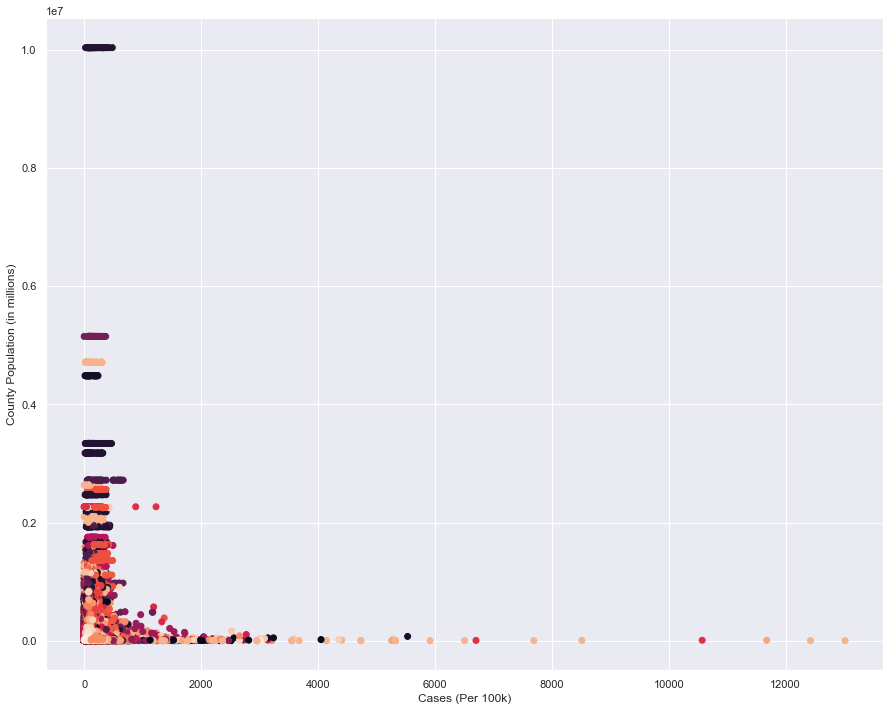

In [17]:
fig, ax = plt.subplots(figsize=(15,12))
x = df['COVID-19 Cases Per 100k']
y = df['County Population']

scatter = plt.scatter(x, y, c=df.State.astype('category').cat.codes)
ax.set_xlabel('Cases (Per 100k)')
ax.set_ylabel('County Population (in millions)')

plt.show()

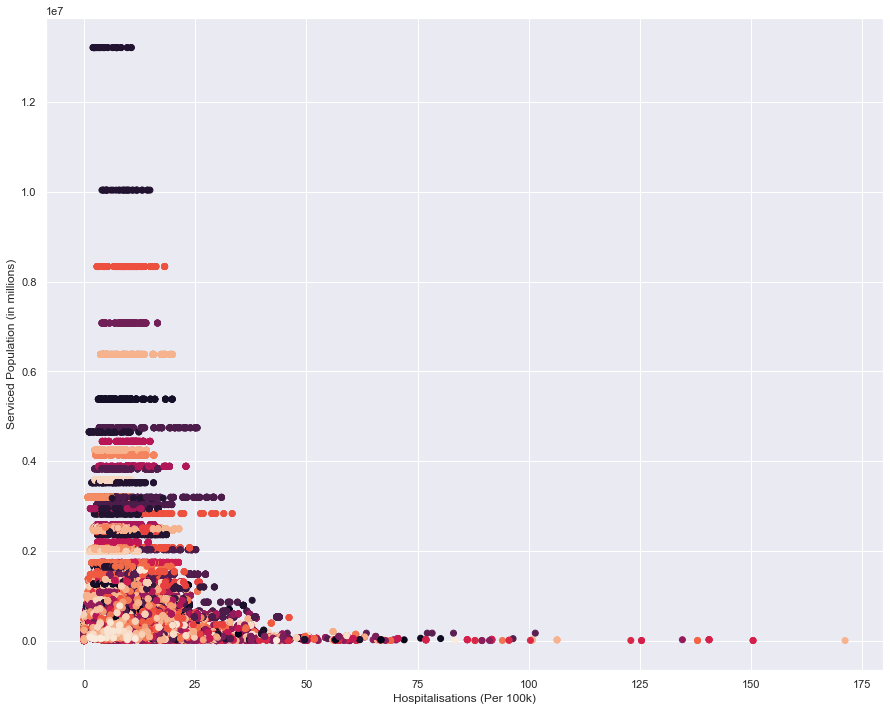

In [18]:
fig, ax = plt.subplots(figsize=(15,12))
x = df['Hospitalisations Per 100k']
y = df['Serviced Population']

scatter = plt.scatter(x, y, c=df.State.astype('category').cat.codes)
ax.set_xlabel('Hospitalisations (Per 100k)')
ax.set_ylabel('Serviced Population (in millions)')

plt.show()

As we can see from what our above descriptive statistics have yielded, we find that it is very easy to see the correlations: the lower the County/Service Area's population, the more likly we were to have outliers in both cases per capita and hospitalisations per capita. Our plot reflects this as most of the outliers are towards the bottom of the graph and depict a clear picture of the likelihood of hospitalisations and cases increasing per capita as you go towards the bottom of the scatterplots.

Interpreting this data is a bit more of a challenge as we need to understand how rates work and how rural areas function with more built-up urban areas. We can discern however the following:

* Typically, especially with a virus as infectious as the Coronavirus, we would expect there to be higher transimission rates and hospitalisations in major cities, however the data doesn't really explain this.
* However, if we look at the metrics being used, it makes sense why the majority of outliers in terms of Hospitalisations and Cases per Capita are low in population (both in terms of the County and Serviced Area)
    * Per Capita numbers can typically be skewed towards lower sample sizes since each additional datapoint (hospitalisations and cases in this instance) will have more of an impact towards the per capita rate
    * Additionally, while viruses such as the Coronavirus spread quicker in more urbanised areas due to higher population density, this is counter-balanced by the fact that rural areas have lower access to hospitals and less access to hospitals. The age distribution of the population also plays a very key role in the eventual rate of Hospitalisations and Cases of COVID-19 since elders and children are at higher risk for contracting the disease and being hopsitalised for the disease.
   
The data in general, however, tells us that almost all of the outliers in terms of Cases and Hospitalisations per Capita were near the bottom in both County and Serviced Area population.

## Relationship Between Hospitalisations and Number of Cases

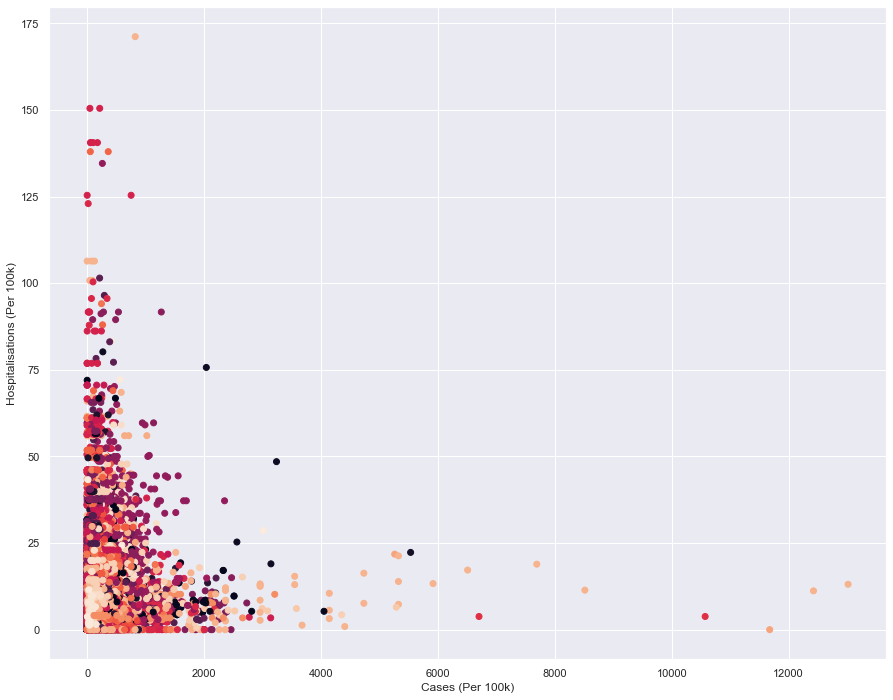

In [19]:
fig, ax = plt.subplots(figsize=(15,12))
x = df['COVID-19 Cases Per 100k']
y = df['Hospitalisations Per 100k']

scatter = plt.scatter(x, y, c=df.State.astype('category').cat.codes)
ax.set_xlabel('Cases (Per 100k)')
ax.set_ylabel('Hospitalisations (Per 100k)')

plt.show()

Somewhat surprisingly, the data indicates to us that there is a negative correlation between the hospitalisations per capita and the cases per capita. This is interesting since we should expect the correlation to be in the inverse (a positive correlation).

We can contextualise these unusual results with the fact that usually strains of the virus that were more infectious and therefore caused higher spread (and increased case numbers) would have relatively mild symptoms. The strains of the virus that were more severe (and thus resulted in more hospitalisations) were generally less infectious. Considering that most of the datapoints are clustred in the 0-2000 cases per 100k range, it makes sense that most of the datapoints with outliers in the number of Hospitalisations would also lie in this range and it corroborates the idea that more infectious strains of the virus were less severe symptomatically. 

## Classifications of Community Levels

The next question we will answer is how the CDC data defined Community Levels of COVID-19 as being low, medium, or high. We will use visualisations based on the Cases and Hospitalisations per Capita to attempt to tease out the reasoning behind these classifications and discuss the implications and how this could have affected the United States' disastrous COVID-19 response.

In [20]:
covid_level_low = df.loc[df['Community Level of COVID-19'] == 'Low']
covid_level_low.head()

,County,State,County Population,Health Area Serviced,Serviced Population,COVID Bed Utilisation,Hospitalisations Per 100k,COVID-19 Cases Per 100k,Community Level of COVID-19
1,Manitowoc County,Wisconsin,78981.0,"Sheboygan (Sheboygan), WI - Manitowoc, WI",244410.0,3.4,9.8,169.66,Low
13,Weston County,Wyoming,6927.0,"Weston, WY",6927.0,6.0,0.0,144.36,Low
60,Greenlee County,Arizona,9498.0,"Pima (Tucson), AZ - Cochise, AZ",1268034.0,2.8,5.9,157.93,Low
65,Carroll County,Arkansas,28380.0,"Boone, AR - Carroll, AR",81446.0,2.9,6.1,105.71,Low
73,Little River County,Arkansas,12259.0,"Bowie (Texarkana), TX - Miller, AR",248210.0,3.2,5.6,179.46,Low


In [21]:
covid_level_medium = df.loc[df['Community Level of COVID-19'] == 'Medium']
covid_level_medium.head()

,County,State,County Population,Health Area Serviced,Serviced Population,COVID Bed Utilisation,Hospitalisations Per 100k,COVID-19 Cases Per 100k,Community Level of COVID-19
0,Lincoln County,Wisconsin,27593.0,"Marathon (Wausau), WI - Wood, WI",291401.0,4.7,13.4,177.58,Medium
4,Portage County,Wisconsin,70772.0,"Portage, WI",70772.0,5.9,7.1,217.60,Medium
5,Sauk County,Wisconsin,64442.0,"Dane (Madison), WI - Sauk, WI",776612.0,5.0,9.0,229.66,Medium
6,Shawano County,Wisconsin,40899.0,"Shawano, WI - Langlade, WI",64644.0,5.2,4.6,205.38,Medium
7,Vernon County,Wisconsin,30822.0,"La Crosse (La Crosse), WI - Monroe, WI",257027.0,3.9,15.6,155.73,Medium


In [22]:
covid_level_high = df.loc[df['Community Level of COVID-19'] == 'High']
covid_level_high.head()

,County,State,County Population,Health Area Serviced,Serviced Population,COVID Bed Utilisation,Hospitalisations Per 100k,COVID-19 Cases Per 100k,Community Level of COVID-19
2,Marathon County,Wisconsin,135692.0,"Marathon (Wausau), WI - Wood, WI",291401.0,4.7,13.4,209.30,High
3,Monroe County,Wisconsin,46253.0,"La Crosse (La Crosse), WI - Monroe, WI",257027.0,3.9,15.6,216.20,High
11,Johnson County,Wyoming,8445.0,"Sheridan, WY - Johnson, WY",38930.0,3.3,12.8,201.30,High
37,Baldwin County,Alabama,223234.0,"Mobile (Mobile), AL - Baldwin, AL",697125.0,5.0,19.2,240.11,High
38,Butler County,Alabama,19448.0,"Butler, AL",19448.0,3.0,15.4,395.93,High


In [23]:
covid_level_low.count()

County                         95705
State                          95705
County Population              95705
Health Area Serviced           95705
Serviced Population            95705
COVID Bed Utilisation          95705
Hospitalisations Per 100k      95705
COVID-19 Cases Per 100k        95705
Community Level of COVID-19    95705
dtype: int64

In [24]:
covid_level_medium.count()

County                         42206
State                          42206
County Population              42206
Health Area Serviced           42206
Serviced Population            42206
COVID Bed Utilisation          42206
Hospitalisations Per 100k      42206
COVID-19 Cases Per 100k        42206
Community Level of COVID-19    42206
dtype: int64

In [25]:
covid_level_high.count()

County                         19708
State                          19708
County Population              19708
Health Area Serviced           19708
Serviced Population            19708
COVID Bed Utilisation          19708
Hospitalisations Per 100k      19708
COVID-19 Cases Per 100k        19708
Community Level of COVID-19    19708
dtype: int64

In [26]:
covid_level_low.describe()

,County Population,Serviced Population,COVID Bed Utilisation,Hospitalisations Per 100k,COVID-19 Cases Per 100k
count,9.570500e+04,9.570500e+04,95705.000000,95705.000000,95705.000000
mean,9.382379e+04,5.164007e+05,2.341086,4.501614,72.594900
std,3.056698e+05,8.977683e+05,1.796334,2.919059,52.428791
min,8.600000e+01,2.274000e+03,0.000000,0.000000,0.000000
25%,1.065000e+04,8.400100e+04,1.000000,2.100000,29.870000
50%,2.491300e+04,2.115710e+05,2.000000,4.400000,64.040000
75%,6.407200e+04,4.996900e+05,3.400000,6.900000,109.160000
max,1.003911e+07,1.321480e+07,9.900000,9.900000,199.980000


In [27]:
covid_level_medium.describe()

,County Population,Serviced Population,COVID Bed Utilisation,Hospitalisations Per 100k,COVID-19 Cases Per 100k
count,4.220600e+04,4.220600e+04,42206.000000,42206.000000,42206.000000
mean,1.129475e+05,7.334365e+05,4.300102,10.589722,197.246184
std,3.494392e+05,1.137156e+06,2.354858,4.383112,214.665762
min,8.600000e+01,2.274000e+03,0.000000,0.000000,0.000000
25%,1.194100e+04,1.038760e+05,2.700000,7.900000,94.760000
50%,2.759300e+04,2.737650e+05,4.000000,10.900000,155.075000
75%,7.423200e+04,7.604200e+05,5.500000,13.500000,236.245000
max,1.003911e+07,1.321480e+07,14.900000,19.900000,11676.850000


In [28]:
covid_level_high.describe()

,County Population,Serviced Population,COVID Bed Utilisation,Hospitalisations Per 100k,COVID-19 Cases Per 100k
count,1.970800e+04,1.970800e+04,19708.000000,19708.000000,19708.000000
mean,1.248883e+05,5.654053e+05,5.940709,18.518794,285.255430
std,3.769513e+05,1.037287e+06,3.322499,9.169540,251.475142
min,8.600000e+01,2.274000e+03,0.000000,0.000000,0.000000
25%,1.238800e+04,1.037300e+05,3.800000,12.500000,209.550000
50%,2.859400e+04,2.421940e+05,5.300000,16.200000,253.810000
75%,7.852200e+04,5.476970e+05,7.200000,22.100000,326.862500
max,1.003911e+07,1.321480e+07,36.000000,171.200000,13017.750000


Now, below, we shall commence our findings of how the CDC determined whether or not the community level of COVID was low, medium or, high. For this, we will juxtapose the serviced population with the hospitalisation and case rate as well as the rate of bed utilisation.

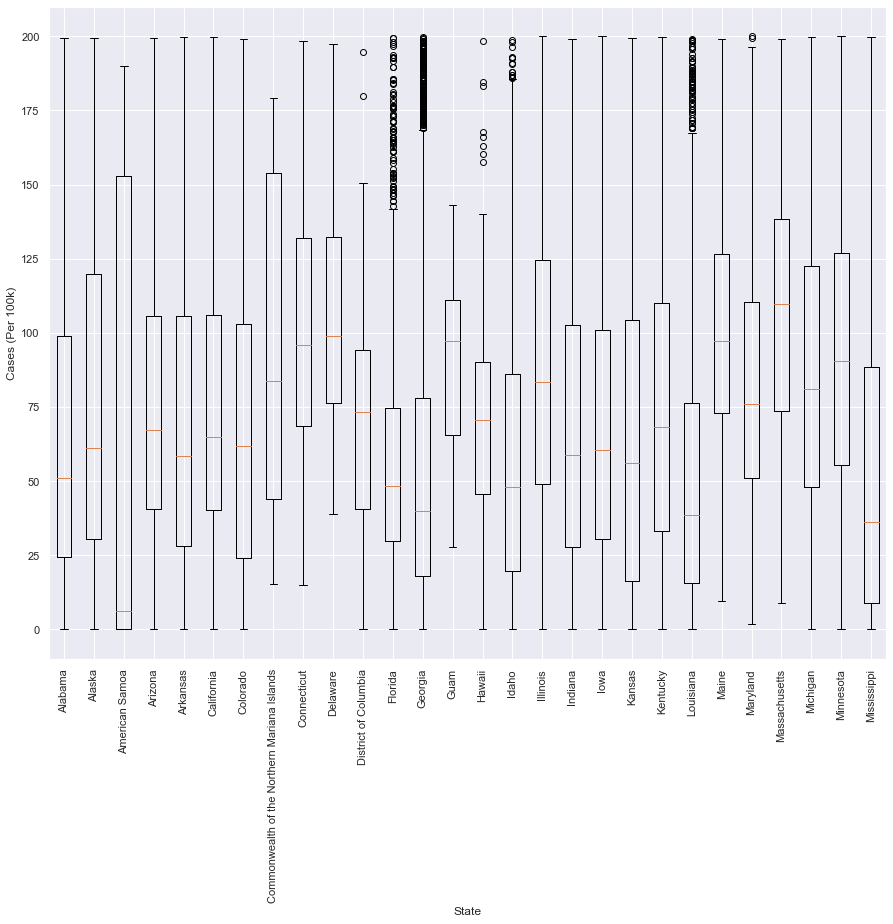

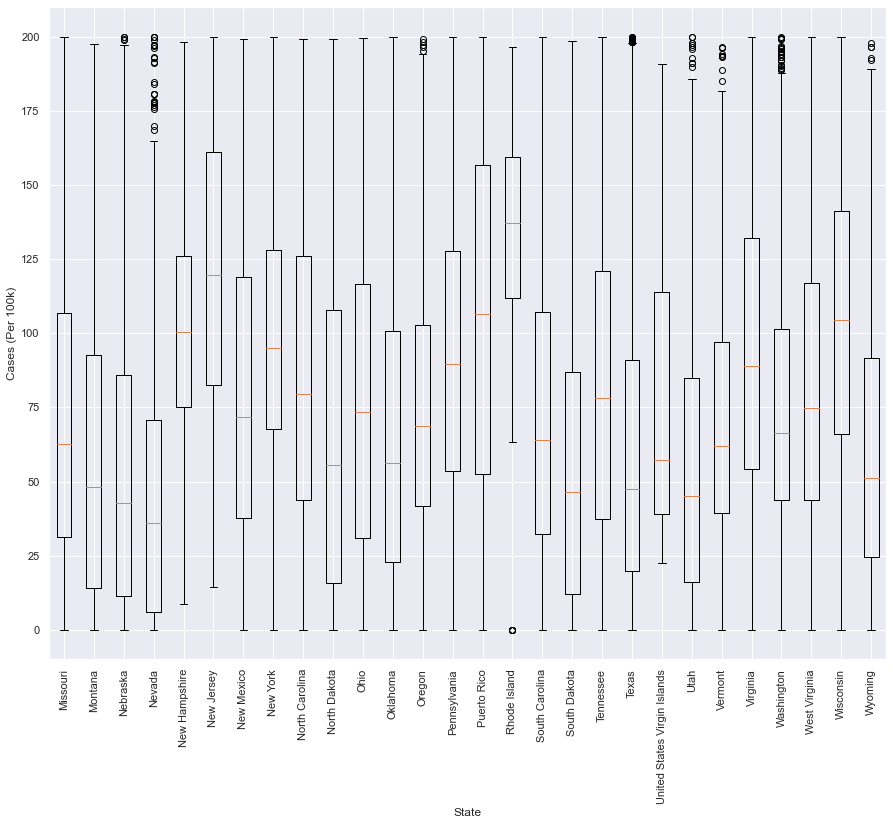

In [29]:
# Code for first half of states

fig, ax = plt.subplots(figsize=(15,12))

grouped = covid_level_low.groupby('State')

keys = list(grouped.groups.keys())

data = [grouped.get_group(name)['COVID-19 Cases Per 100k'] for name in keys[:len(keys)//2]]

plt.boxplot(data, labels=keys[:len(keys)//2])

plt.xlabel('State')
plt.ylabel('Cases (Per 100k)')

plt.xticks(rotation=90)

plt.show()

# Code for second half of states

fig, ax = plt.subplots(figsize=(15,12))

grouped = covid_level_low.groupby('State')

keys = list(grouped.groups.keys())

data = [grouped.get_group(name)['COVID-19 Cases Per 100k'] for name in keys[len(keys)//2:]]

plt.boxplot(data, labels=keys[len(keys)//2:])

plt.xlabel('State')
plt.ylabel('Cases (Per 100k)')

plt.xticks(rotation=90)

plt.show()

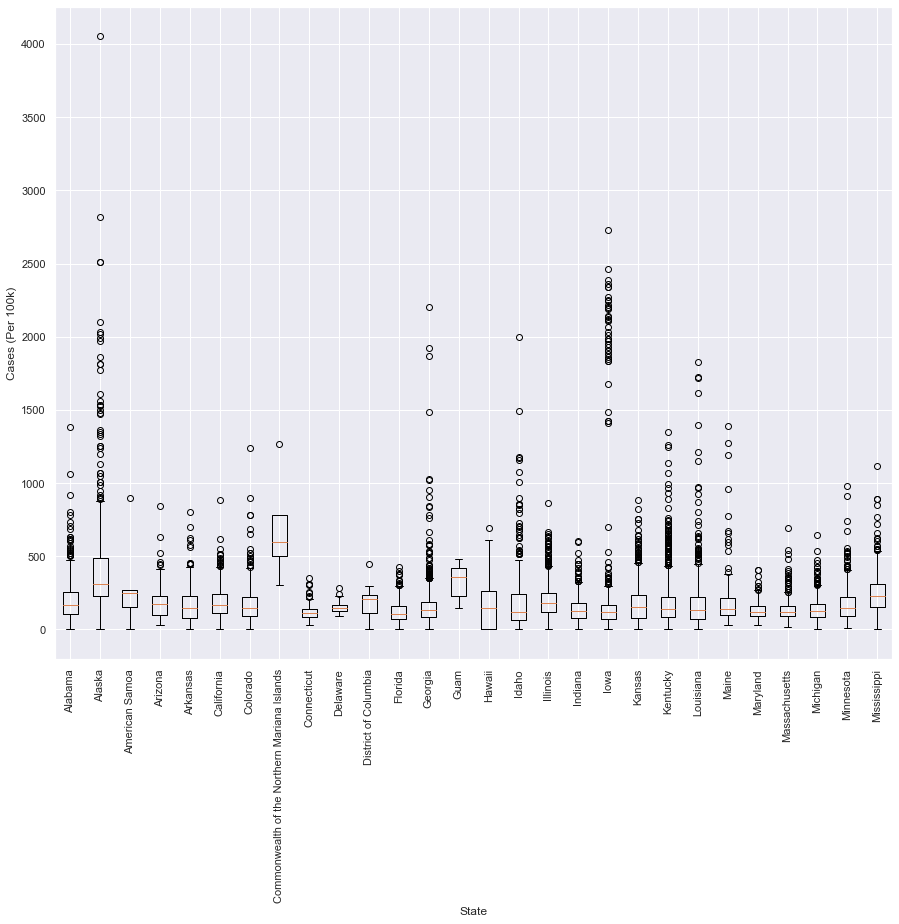

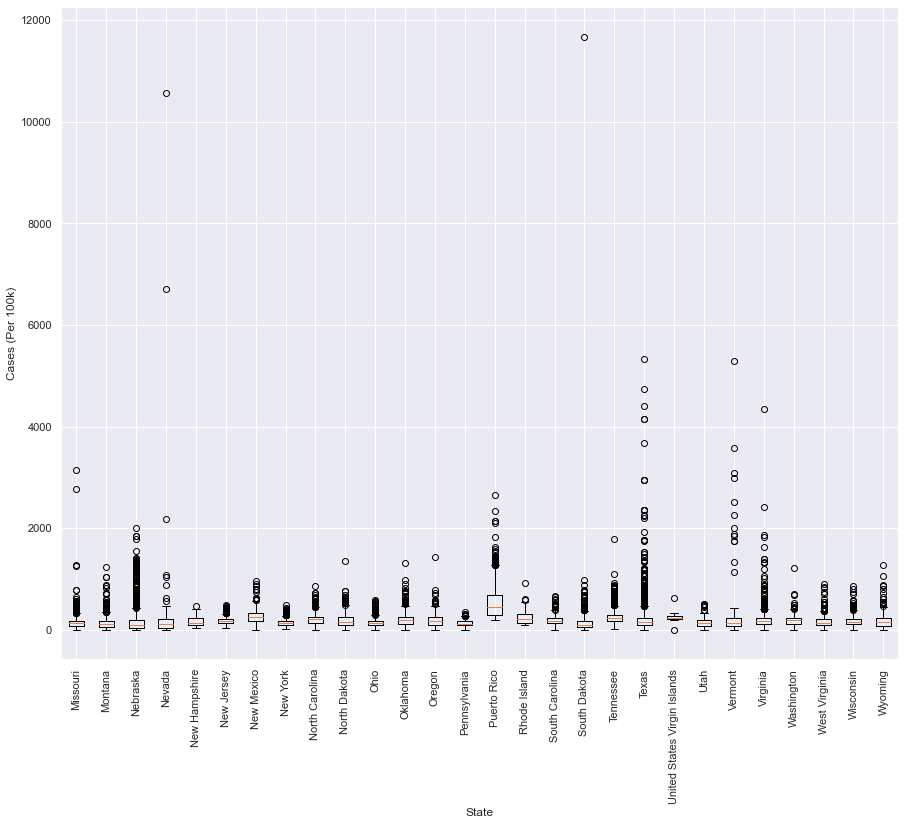

In [30]:
# Code for first half of states

fig, ax = plt.subplots(figsize=(15,12))

grouped = covid_level_medium.groupby('State')

keys = list(grouped.groups.keys())

data = [grouped.get_group(name)['COVID-19 Cases Per 100k'] for name in keys[:len(keys)//2]]

plt.boxplot(data, labels=keys[:len(keys)//2])

plt.xlabel('State')
plt.ylabel('Cases (Per 100k)')

plt.xticks(rotation=90)

# There is one value which is too high, these values distort the picture of the graph, so we set a limitation
#plt.ylim(-100,3000)

plt.show()

# Code for second half of states

fig, ax = plt.subplots(figsize=(15,12))

grouped = covid_level_medium.groupby('State')

keys = list(grouped.groups.keys())

data = [grouped.get_group(name)['COVID-19 Cases Per 100k'] for name in keys[len(keys)//2:]]

plt.boxplot(data, labels=keys[len(keys)//2:])

plt.xlabel('State')
plt.ylabel('Cases (Per 100k)')

plt.xticks(rotation=90)

# There are three value which are too high, these values distort the picture of the graph, so we set a limitation
#plt.ylim(-100,6000)

plt.show()

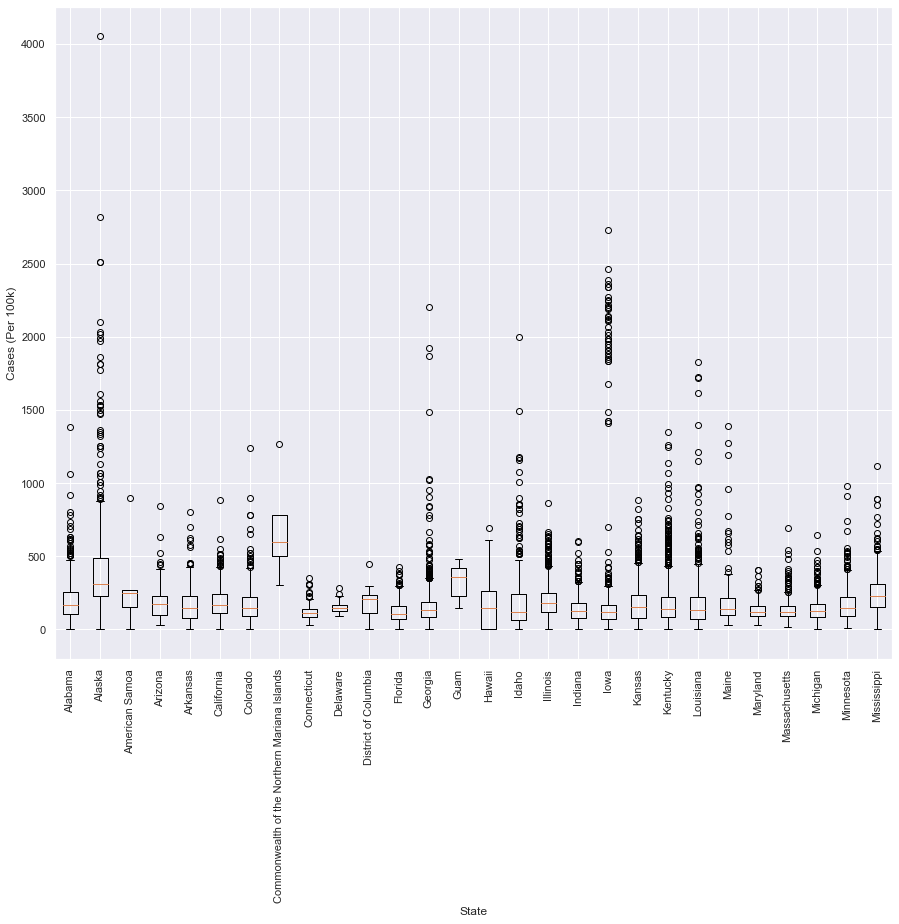

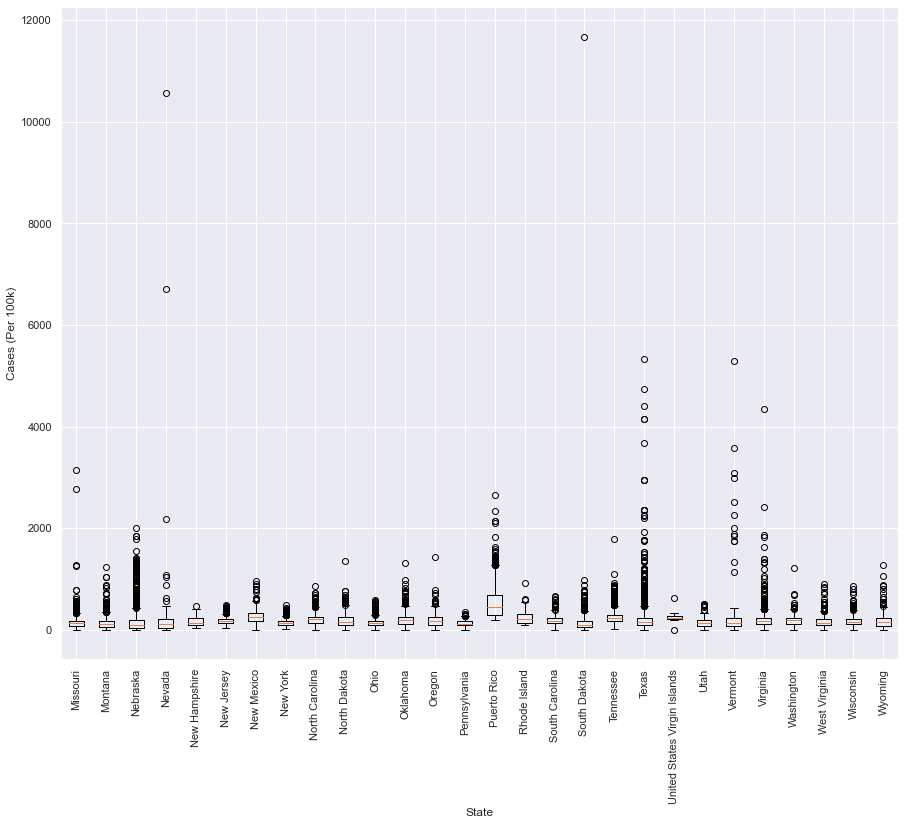

In [31]:
# Code for first half of states

fig, ax = plt.subplots(figsize=(15,12))

grouped = covid_level_medium.groupby('State')

keys = list(grouped.groups.keys())

data = [grouped.get_group(name)['COVID-19 Cases Per 100k'] for name in keys[:len(keys)//2]]

plt.boxplot(data, labels=keys[:len(keys)//2])

plt.xlabel('State')
plt.ylabel('Cases (Per 100k)')

plt.xticks(rotation=90)

# There is one value which is too high, these values distort the picture of the graph, so we set a limitation
#plt.ylim(-100,3500)

plt.show()

# Code for second half of states

fig, ax = plt.subplots(figsize=(15,12))

grouped = covid_level_medium.groupby('State')

keys = list(grouped.groups.keys())

data = [grouped.get_group(name)['COVID-19 Cases Per 100k'] for name in keys[len(keys)//2:]]

plt.boxplot(data, labels=keys[len(keys)//2:])

plt.xlabel('State')
plt.ylabel('Cases (Per 100k)')

plt.xticks(rotation=90)

# There are three value which are too high, these values distort the picture of the graph, so we set a limitation
#plt.ylim(-100,4000)

plt.show()

In this situation, from the boxplots that are created above, we see that there does not seem to be a significant difference in the values of the mean, median, and IQR. The main differences between the COVID-19 Community Levels and their classification as low, medium, or high appears to be influenced most heavily by the outliers. Certain states have higher outliers in general but the outlier values seem to have the main influence on determining the classification of COVID-19 Community Levels. 

There are most likely other confounding factors that affect the distribution which can explain the minute differences in the mean, median, and IQR of the three classifications such as elderly population of a specific county, whether or not there are sufficient hospital beds realtive to the population, and whether or not an area is rural. All of these are factors that can greatly affect the risk level of COVID-19 in any specific county in the nation.

Another point of contention is that in the above graph, we see multiple noticeable outliers, almost entirely concentrated in mostly rural states such as Alaska, South Dakota, Nebraska, and Nevada. These outliers are likely due again, to the fact that a single case in an area with lower populations will have a greater effect on the resulting statistics than a singular case in a more densely populated state. Since the cases are all per capita (per 100k) it makes sense that there are outliers in areas with lower populations. 

## Distribution of Cases and Hospitalisations by State

Our next order of work is to find out how different states' responses and actions during the pandemic could have influenced the overall impact of the pandemic on their respective states.

In [32]:
df['State'].unique()

array(['Wisconsin', 'Wyoming', 'Puerto Rico',
       'United States Virgin Islands', 'Alabama', 'Kansas', 'Alaska',
       'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'American Samoa', 'Delaware',
       'District of Columbia', 'Guam',
       'Commonwealth of the Northern Mariana Islands'], dtype=object)

In [33]:
df['State'].nunique()

56

In [34]:
df['State'].value_counts()

Texas                                           12389
Georgia                                          7777
Virginia                                         6514
Kentucky                                         5880
Missouri                                         5504
Kansas                                           5143
Illinois                                         4998
North Carolina                                   4900
Iowa                                             4851
Tennessee                                        4653
Nebraska                                         4557
Indiana                                          4508
Ohio                                             4312
Minnesota                                        4263
Michigan                                         4067
Mississippi                                      4018
Puerto Rico                                      3822
Oklahoma                                         3771
Arkansas                    

Our purpose here is to discern the difference in cases and how states responded to the virus. In order to simplify and not make our dataframe too large, we decided to only take the states with over 5000 recorded observations for sample size. 

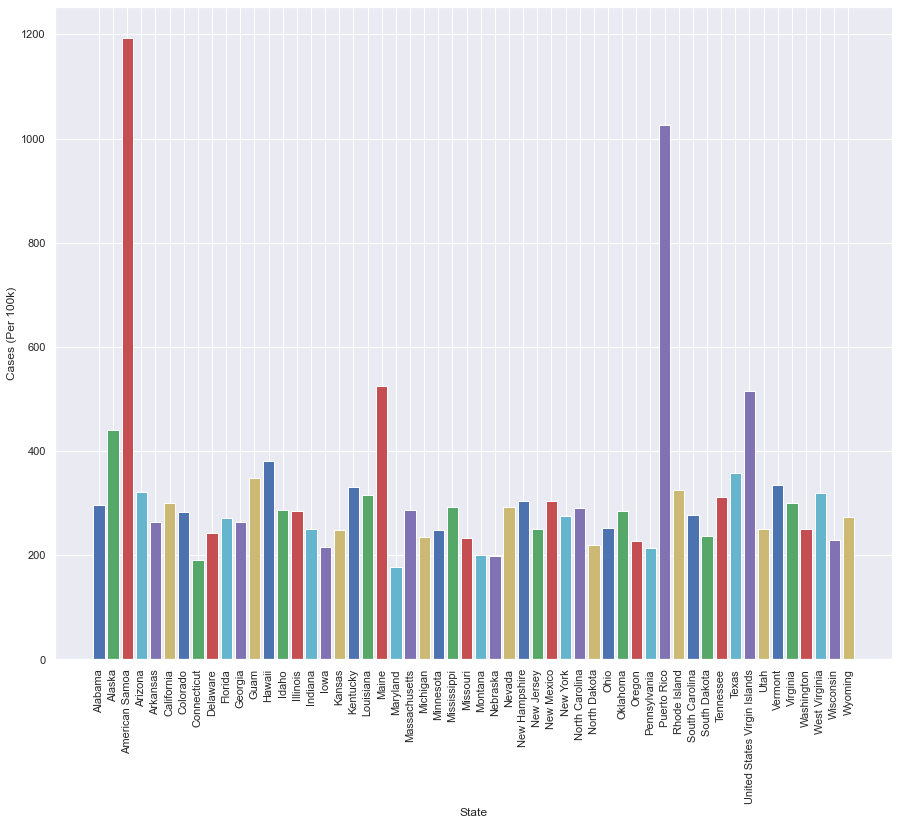

In [37]:
fig, ax = plt.subplots(figsize=(15,12))

state_totals = covid_level_high.groupby('State')['COVID-19 Cases Per 100k'].mean()

n_states = len(state_totals)
colors = ['b', 'g', 'r', 'c', 'm', 'y']

plt.bar(state_totals.index, state_totals, color=colors[:n_states])

plt.xlabel('State')
plt.ylabel('Cases (Per 100k)')

plt.xticks(rotation=90)

plt.show()

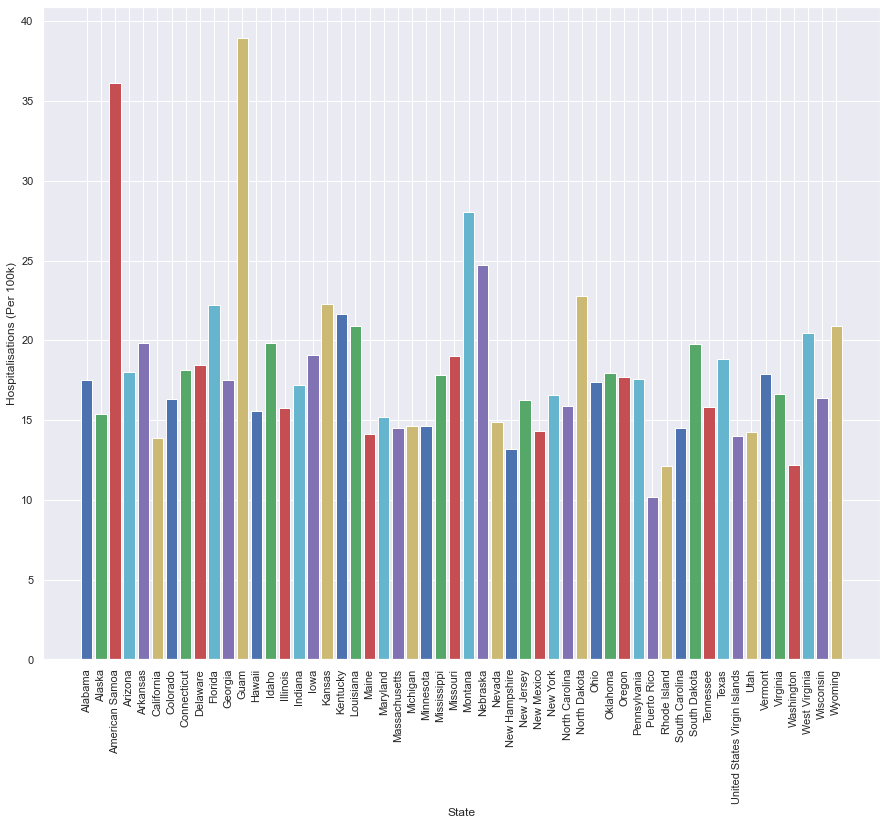

In [38]:
fig, ax = plt.subplots(figsize=(15,12))

state_totals = covid_level_high.groupby('State')['Hospitalisations Per 100k'].mean()

n_states = len(state_totals)
colors = ['b', 'g', 'r', 'c', 'm', 'y']

plt.bar(state_totals.index, state_totals, color=colors[:n_states])

plt.xlabel('State')
plt.ylabel('Hospitalisations (Per 100k)')

plt.xticks(rotation=90)

plt.show()

According to the two bar graphs shown above, we can discern the following facts from the data:

1. There is a moderate correlation between the number of cases per capita in a state/territory and the number of hospitalisations per capita, as we would expect since the more cases there are the more likely it is to encounter a case of sufficient severity to warrant hospitalisation
2. There seems to be a low correlation between the rate of cases and the population density of a state/territory. If we look at the graphs we see that the five states with the highest mean cases per capita are Alaska, American Samoa, Maine, Puerto Rico, and the US Virgin Islands. If we look at the graph of hospitalisations, we can discern that the five states with the highest mean hospitalisations per capita are American Samoa, Guam, Missouri, Montana, and North Dakota. None of these states/territories have a particularly high population relative to the other states. While it is true that the territories of American Samoa, Puerto Rico, and the US Virgin Islands have a high population density relative to US average, this can also just as easily be chalked up to the relative remoteness of the territories to the United States mainland along with other factors. It is much more likely, based off the overall trend of the two bar graphs that there are other factors at play: state/territory level response to the pandemic, availability of hospital beds, accessibility of medical care, etc. 
3. The data from the bar graphs does affirm the previous finding where we compared the county/serviced area population to the cases and hospitalisations per capita in that states with lower population densities generally have higher rates of COVID-19 among its citizenry. This, as stated prior, is most likely attributable to the fact that the rate is per 100k and not lower, which puts areas with low populations/population densities at a disadvantage in general.

# Conclusion

Based off our findings, we can make the following conclusions about the data:

1. There is a low correlation between the rate of hospitalisation and the rate of cases per capita. This is likely chalked up to the fact that when more strains of the virus began reaching the United States, the infectiousness of the virus strains increase but the overall symptoms and effect they had on people's health lowered, resulting in a higher cases rate but lower hospitalisation rates.
2. There was a relatively poor correlation between the rate of hospitalisations and the rate of cases per capita and the population of the given county/serviced area. This is likely due to two factors:
    1. The rate of the hospitalisations and cases is given per 100k; this specific rate will give a lower weight to each individual case/hospitalisation in a more populated area more weight and will give a higher weight to an individual hospitalisation/case in a less populated area.
    2. While more densely populated areas and more populated areas in general have higher population densities and therefore a higher likelihood of running into an infected individual, it is also much easier to seek medical attention and tests and vaccinations for the virus. Thus it appears that the increased risk factors in more populated areas was counterbalanced by the lack of access and likely lower quality of medical attention, vaccines, and tests that were able to be accessed by populations in more rural backgrounds.
3. The COVID-19 Community Level classification into groups of either low, medium, or high appeared to be based off the outliers in each group rather than the mean, median, or IQR of each state. It appears to take into factors outside the scope of the data provided in this dataset to assess the risk levels of communities to the pandemic.
4. Our analysis of the distribution of cases and hospitalisations by state yielded a similar result to the realtionship between the hospitalisations/cases per capita and population of the county/serviced area. In both instances, we found that the rate of cases and hospitalisations in rural areas was higher on aggregate than the rate of cases and hospitalisations in more urbanised and more densely populated areas.